In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [8]:
dset = pd.read_csv("E:\\DATASET\\data set 1.csv")

In [9]:
dset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
dset.shape          #The number of rows and columns

(7043, 21)

In [11]:
dset.nunique()      #To understand the number of unique values or the levels in each feature 

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [12]:
dset.info()         #Datatype of each feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


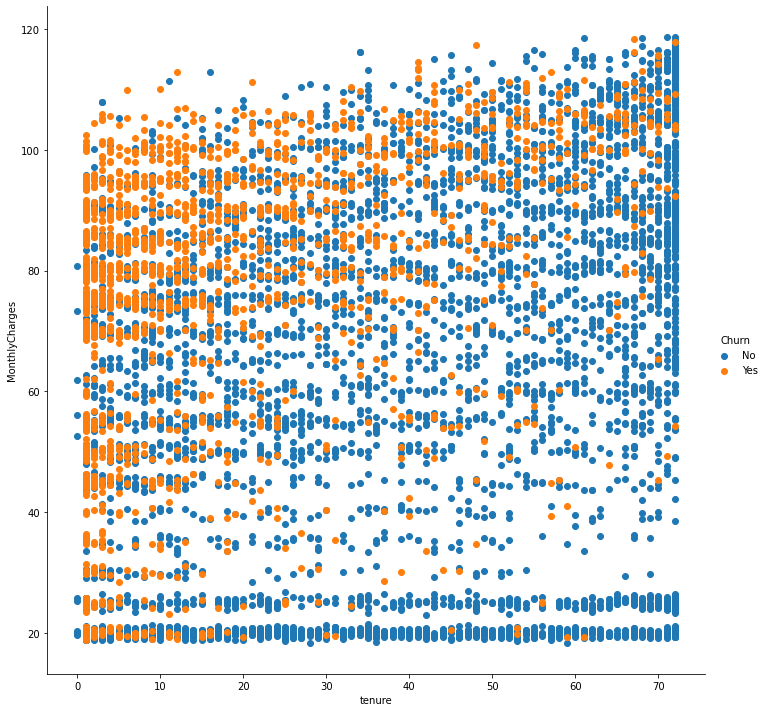

In [13]:
sns.FacetGrid(dset, hue ='Churn',height = 10 ).map(plt.scatter,'tenure','MonthlyCharges').add_legend();
plt.show()  
# visualize the distribution of a variable or the relationship between
# multiple variables separately within subsets of your dataset.
# The plot below shows how customers with short tenure and high charges have churned in greater prportion

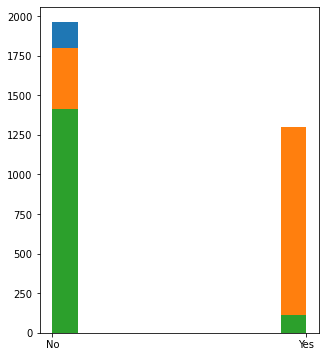

In [15]:
plt.hist(dset[dset.InternetService == 'DSL'].Churn)
plt.hist(dset[dset.InternetService == 'Fiber optic'].Churn)
plt.hist(dset[dset.InternetService == 'No'].Churn)
rcParams['figure.figsize'] = 5,6
plt.show()

# The plot below shows that customers who use fiber optics have churned in greater prportion than
# those who either dont have an internet service or do through DSL (Digital Subscriber Line)

In [16]:
dset1 = dset.drop(['SeniorCitizen'],1)  # Without the senior citizen feature i was able to 
                                        # to avoid an error (Could not convert float value "scott")

In [17]:
dset1.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

C:\Users\PADDY\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


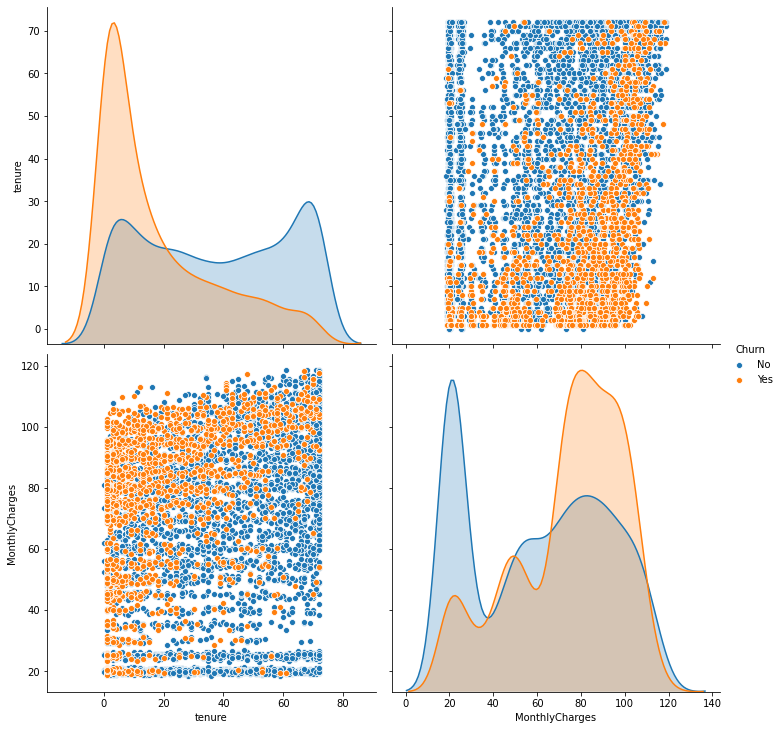

In [24]:
sns.pairplot(dset1,hue = 'Churn',size = 5)   # To undestand the Multivarite relationships between numeric Values
plt.show()

'''The plot below shows us that :-
1) Customers with less than 24 months tenure have churned in a greater proportion
2) Customers who have monthly charges more than 70 have churned in greater proportion
'''

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
dset = pd.read_csv("E:\\DATASET\\data set 1.csv")

In [19]:
dset.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [20]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [21]:
dset.drop(['customerID', 'TotalCharges'], axis=1, inplace=True)
# Since customer ID seems irrelevant and TotalCharger have more than 6500 uniques values
# as opposed to fewer levels of other features that is, acccording to the profile report 
# 92.7% values are unique

In [22]:
dset.shape

(7043, 19)

In [23]:
dset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [24]:
senior = {0 : 'No',
        1 : 'Yes'}
dset['SeniorCitizen'] = dset['SeniorCitizen'].map(senior)

# Since the values of SeniorCitizen are in zeroes and ones, We'll convert it to 'yes' and 'no' just like the levels of 
# other features

In [25]:
dset['SeniorCitizen'].unique()

array(['No', 'Yes'], dtype=object)

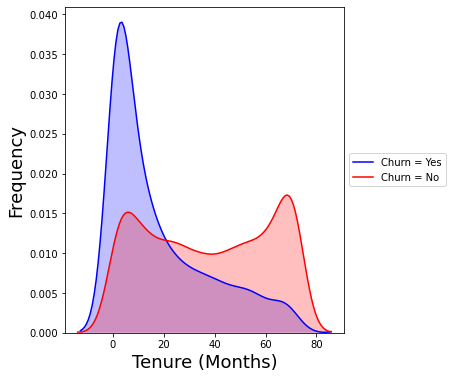

In [41]:
g1 = sns.kdeplot(dset[dset['Churn'] == 'Yes']['tenure'], shade=True, color="b", label='Churn = Yes')
g1 = sns.kdeplot(dset[dset['Churn'] == 'No']['tenure'], shade=True, color="r", label='Churn = No')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Tenure (Months)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
rcParams['figure.figsize'] = 5,6
plt.show()

# Same as the pairplot 

In [26]:
# Converting numeric value of levels to categorical features helps us understand the proportion of customers who churned 
# who had tenure more or less than 24 months (Based on the KDE plot above).

def tenure(data):
    if 0 < data  <= 24 :
        return 'Short'
    else:
        return 'Long'

dset['tenure'] = dset['tenure'].apply(tenure)

In [27]:
dset.tenure.unique()

array(['Short', 'Long'], dtype=object)

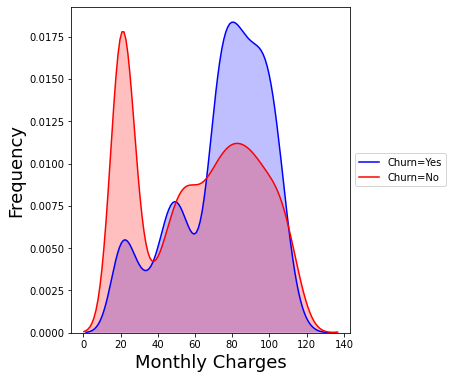

In [44]:
g2 = sns.kdeplot(dset[dset['Churn'] == 'Yes']['MonthlyCharges'], shade=True, color="b", label='Churn=Yes')
g2 = sns.kdeplot(dset[dset['Churn'] == 'No']['MonthlyCharges'], shade=True, color="r", label='Churn=No')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Monthly Charges', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
rcParams['figure.figsize'] = 5,6
plt.show()

In [28]:
# Same as the tenure feature, we'll be dividing the MontlhyCharges feature to 2 levels, namely HighCharge and LowCharge
# with 70 as the Boundary for High/Low charge.

In [29]:
# Converting numeric value of levels to categorical features
def charges(data):
    if 0 < data  <= 70 :
        return 'LowCharge'
    else:
        return 'HighCharge'

dset['MonthlyCharges'] = dset['MonthlyCharges'].apply(charges)

In [30]:
recode = {'No phone service' : 'No',
          'No internet service' : 'No',
            'Fiber optic' : 'Fberoptic',
            'Month-to-month' : 'MtM',
            'Two year' : 'TwoYr',
            'One year' : 'OneYr' ,
            'Electronic check' : 'check',
            'Mailed check' : 'check',
            'Bank transfer (automatic)' : 'automatic',
            'Credit card (automatic)' : 'automatic'
            }
dset.replace(recode, inplace=True)

# Some levels are renamed for a cleaner approach

In [31]:
dset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,No,Yes,No,Short,No,No,DSL,No,Yes,No,No,No,No,MtM,Yes,check,LowCharge,No
1,Male,No,No,No,Long,Yes,No,DSL,Yes,No,Yes,No,No,No,OneYr,No,check,LowCharge,No
2,Male,No,No,No,Short,Yes,No,DSL,Yes,Yes,No,No,No,No,MtM,Yes,check,LowCharge,Yes
3,Male,No,No,No,Long,No,No,DSL,Yes,No,Yes,Yes,No,No,OneYr,No,automatic,LowCharge,No
4,Female,No,No,No,Short,Yes,No,Fberoptic,No,No,No,No,No,No,MtM,Yes,check,HighCharge,Yes


In [32]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7043 non-null   object
 1   SeniorCitizen     7043 non-null   object
 2   Partner           7043 non-null   object
 3   Dependents        7043 non-null   object
 4   tenure            7043 non-null   object
 5   PhoneService      7043 non-null   object
 6   MultipleLines     7043 non-null   object
 7   InternetService   7043 non-null   object
 8   OnlineSecurity    7043 non-null   object
 9   OnlineBackup      7043 non-null   object
 10  DeviceProtection  7043 non-null   object
 11  TechSupport       7043 non-null   object
 12  StreamingTV       7043 non-null   object
 13  StreamingMovies   7043 non-null   object
 14  Contract          7043 non-null   object
 15  PaperlessBilling  7043 non-null   object
 16  PaymentMethod     7043 non-null   object
 17  MonthlyCharges

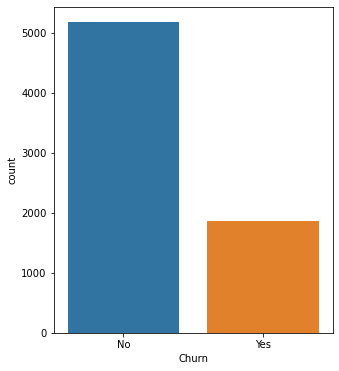

In [33]:
sns.countplot(dset.Churn)
rcParams['figure.figsize'] = 5,6
plt.show()
# to understand the proportion of people who have churned in total

In [34]:
sum(dset.Churn == 'No')

5174

In [35]:
sum(dset.Churn == 'Yes')

1869

In [36]:
dset.Churn.value_counts(1) * 100    # IN percentage

# the parameter of value_counts(), is set to 1 which normalizes the values

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [37]:
# The following is a 3 x 3 subplot of countplots of first 9 categorical features.

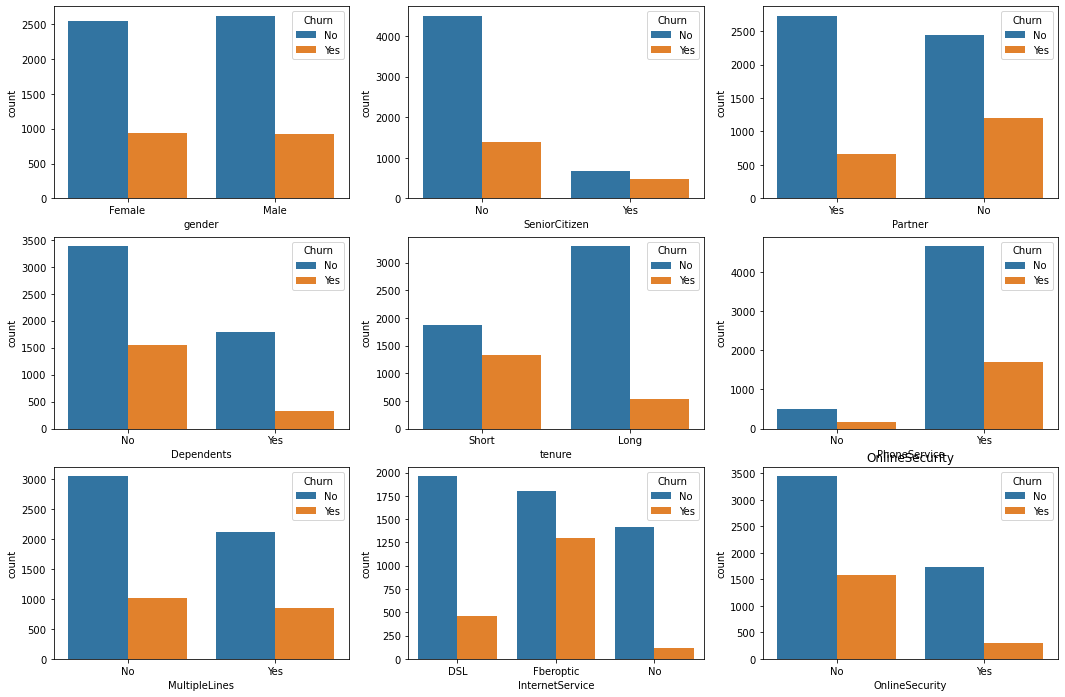

In [57]:
dset_first = dset[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','Churn']]

fig, ax = plt.subplots(3, 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(dset_first.columns) - 1:  # Notice the -1, its because we dont want include 'Churn' from the list.
        sns.countplot(x=dset_first.columns[i],hue='Churn', data=dset_first, ax=ax)
        plt.title(dset_first.columns[i])

In [38]:
'''
The following features show statistical signficance on churn :-
1)SeniorCitizen_Yes
2)Partner_No
3)Dependents_No
4)tenure_short
5)MultipleLines
6)InternetService_Fiberoptic
7)OnlineSecurity_No
'''

'\nThe following features show statistical signficance on churn :-\n1)SeniorCitizen_Yes\n2)Partner_No\n3)Dependents_No\n4)tenure_short\n5)MultipleLines\n6)InternetService_Fiberoptic\n7)OnlineSecurity_No\n'

In [39]:
# Similarly with the other 9 features

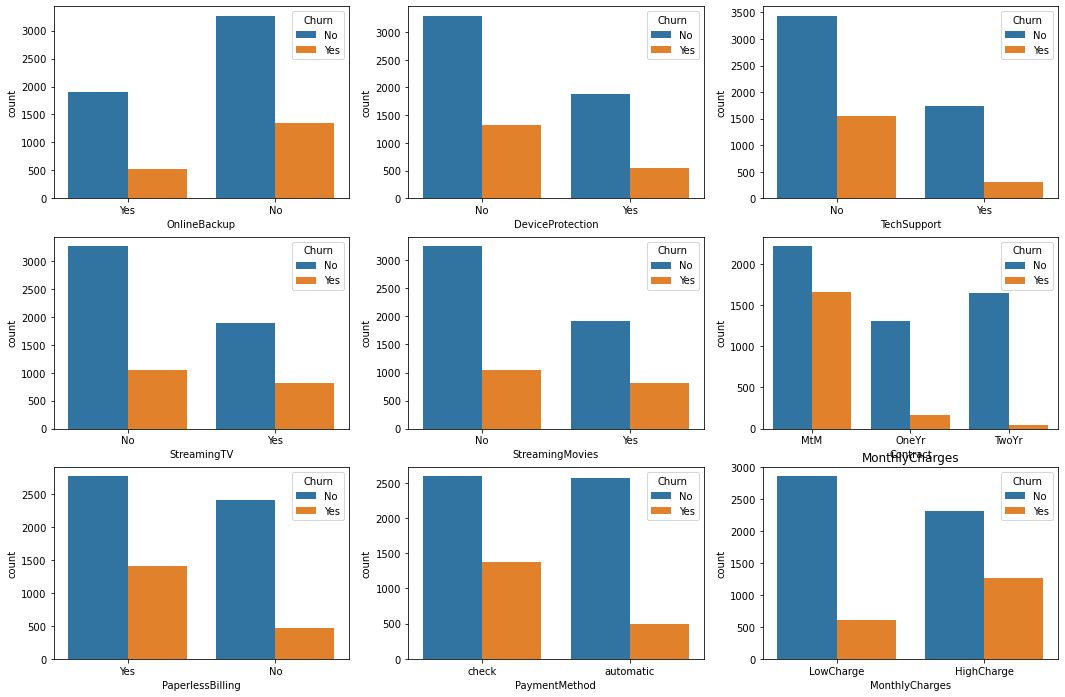

In [59]:
dset_second = dset[['OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn']]

fig, ax = plt.subplots(3, 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(dset_second.columns) - 1:
        sns.countplot(x=dset_second.columns[i],hue='Churn', data=dset_second, ax=ax)
        plt.title(dset_second.columns[i])

In [40]:
'''
The following features show statistical signficance on churn :-
1)OnlineBackup_No
2)DeviceProtection_No
3)TechSupport_No
4)StreamingTV_Yes
5)StreamingMovies_Yes
6)Contract_Mtm
7)PaperlessBilling_Yes
8)PaymentMethod_Check
9)MonthlyCharges_HighCharge
'''

'\nThe following features show statistical signficance on churn :-\n1)OnlineBackup_No\n2)DeviceProtection_No\n3)TechSupport_No\n4)StreamingTV_Yes\n5)StreamingMovies_Yes\n6)Contract_Mtm\n7)PaperlessBilling_Yes\n8)PaymentMethod_Check\n9)MonthlyCharges_HighCharge\n'

In [41]:
First = pd.melt(dset, id_vars=['Churn'], value_vars=dset[dset.columns[1:18]],   
             var_name='variable1', value_name='event')                        
                                                                        
# returns a dataframe with an id_variable(Churn)
# and one or more features to be split in their groups
#print(First)

# concatenating two colums to create a new variable name 
First['variable2'] = First['variable1'] +'_'+First['event']
#print(First.variable2)


UNO = pd.crosstab(First.Churn, First.variable2, normalize='columns').T.add_prefix('churn_')  
# add_prefix = string to add before each label
# T to transpose
# UNO is cross tabulation of factors
# and, normalize='columns' divides all
# the values with the sum of values            
#print(UNO)    


DOS = UNO.assign(**UNO.index.to_frame()).sort_values(['churn_Yes'])
# Dataframe.assign() method assign new columns to a DataFrame
# Index.to_frame() function create a dataFrame from the given index with a column containing the Index.
# By default, the original Index is reused in the new dataframe
print(DOS)
print("\n")
print("The Average of churn proportion :",DOS.mean(axis =0))

Churn                      churn_No  churn_Yes                  variable2
variable2                                                                
Contract_TwoYr             0.971681   0.028319             Contract_TwoYr
InternetService_No         0.925950   0.074050         InternetService_No
Contract_OneYr             0.887305   0.112695             Contract_OneYr
tenure_Long                0.860042   0.139958                tenure_Long
OnlineSecurity_Yes         0.853888   0.146112         OnlineSecurity_Yes
TechSupport_Yes            0.848337   0.151663            TechSupport_Yes
Dependents_Yes             0.845498   0.154502             Dependents_Yes
PaymentMethod_automatic    0.840183   0.159817    PaymentMethod_automatic
PaperlessBilling_No        0.836699   0.163301        PaperlessBilling_No
MonthlyCharges_LowCharge   0.826012   0.173988   MonthlyCharges_LowCharge
InternetService_DSL        0.810409   0.189591        InternetService_DSL
Partner_Yes                0.803351   

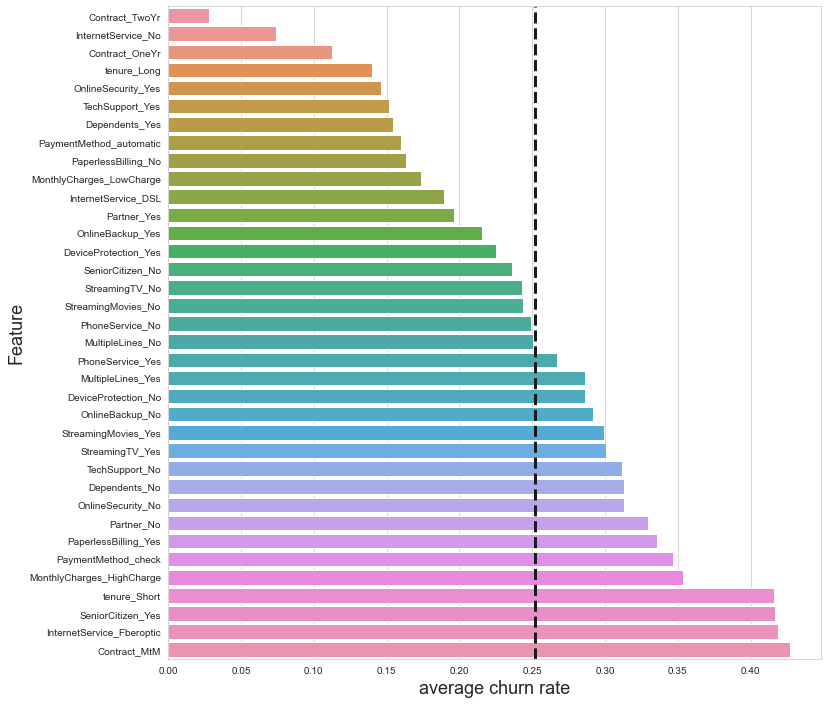

In [50]:
from matplotlib import rcParams
sns.barplot(y='variable2', x='churn_Yes', data=DOS )
rcParams['figure.figsize'] = 11.7,12
t1 = sns.set_style('whitegrid')
plt.axvline(0.251879, ls="--", lw=3, c=".1")    #Makes a verticle line on the plot
plt.xlabel('average churn rate', fontsize=18)
plt.ylabel('Feature', fontsize=18)
plt.show()


In [31]:
'''
The following are some of the features that must be included for the model.

1. Contract -Month to Month :
Cellular service plan which could be changed/updated on a monthly/yearly basis.
---We see a high churning rate of people who have a Contract on a month to month basis as comapared to people who have an
   annual plan, because it is much easier to decide on an annual plan with very limited choices than it is to decide 
   different plans 12 times a year.
 
2.Tenure_short:
Number of months the customer has stayed with the company.
---Longer tenure instills trust and loyalty with the company which is not the same with shorter tenure.

3.MonthlyCharges_HighCharge:
The amount charged to the customer monthly.
---High monthly charged is not favorable.

4.Senior Citizen_Yes:
Whether or not the user is a Senior Citizen
---There is greater chance for a Senior Citizen to leave the service as they may not require a cellular service

5. InternetService_Fiberoptics:
The internet Serivice Provided by the company through different Modes
---We observe that people who have internet service through Fiber optics have significant churn rate compared to DSL users 
   and it may be because of the following disadvatages of Fiber Optics:
   1) Limited Application—Fiber optic cable can only be used on the ground,
      and it cannot leave the ground or work with mobile communication.
   2)Low Power—Light emitting sources are limited to low power. Although high power emitters are available to 
     improve power supply, it would add extra cost.
   3)Fragility—Optical fiber is rather fragile and more vulnerable to damage compared to copper wires. 
     You’d better not to twist or bend fiber optic cables.
   4)Distance—The distance between the transmitter and receiver should keep short
     or repeaters are needed to boost the signal.
   5)DSL service is much Cheaper.
   '''


'\nThe following are some of the features that must be included for the model.\n\n1. Contract -Month to Month :\nCellular service plan which could be changed/updated on a monthly/yearly basis.\n---We see a high churning rate of people who have a Contract on a month to month basis as comapared to people who have an\n   annual plan, because it is much easier to decide on an annual plan with very limited choices than it is to decide \n   different plans 12 times a year.\n \n2.Tenure_short:\nNumber of months the customer has stayed with the company.\n---Longer tenure instills trust and loyalty with the company which is not the same with shorter tenure.\n\n3.MonthlyCharges_HighCharge:\nThe amount charged to the customer monthly.\n---High monthly charged is not favorable.\n\n4.Senior Citizen_Yes:\nWhether or not the user is a Senior Citizen\n---There is greater chance for a Senior Citizen to leave the service as they may not require a cellular service\n\n5. InternetService_Fiberoptics:\nThe 

In [42]:
dset.InternetService.unique()

array(['DSL', 'Fberoptic', 'No'], dtype=object)

In [43]:
dset['N_Int_Ser(Fiber)'] = (dset.InternetService)
def N_con(data):
    if data == 'Fberoptic':
        return 'Yes'
    else:
        return 'No'

dset['N_Int_Ser(Fiber)'] = dset['N_Int_Ser(Fiber)'].apply(N_con)
dset['N_Int_Ser(Fiber)'].unique()

array(['No', 'Yes'], dtype=object)

In [44]:
dset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,N_Int_Ser(Fiber)
0,Female,No,Yes,No,Short,No,No,DSL,No,Yes,No,No,No,No,MtM,Yes,check,LowCharge,No,No
1,Male,No,No,No,Long,Yes,No,DSL,Yes,No,Yes,No,No,No,OneYr,No,check,LowCharge,No,No
2,Male,No,No,No,Short,Yes,No,DSL,Yes,Yes,No,No,No,No,MtM,Yes,check,LowCharge,Yes,No
3,Male,No,No,No,Long,No,No,DSL,Yes,No,Yes,Yes,No,No,OneYr,No,automatic,LowCharge,No,No
4,Female,No,No,No,Short,Yes,No,Fberoptic,No,No,No,No,No,No,MtM,Yes,check,HighCharge,Yes,Yes


In [45]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in dset.columns:
    dset[i] = le.fit_transform(dset[i])

In [46]:
dset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,N_Int_Ser(Fiber)
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0
1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,1,0,0
2,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,1,1,1,0
3,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0
4,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,1


In [47]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = dset.iloc[:,:] #All independent Columns
y = dset.iloc[:,-2]   # Target Column

# applying SelectKBest class to extract top 10 best features
best_feat = SelectKBest(score_func = chi2, k = 10)
fit = best_feat.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

feat_scores = pd.concat([dfcolumns,dfscores], axis = 1)
feat_scores.columns = ['Features', 'Score']

feat_scores.sort_values(['Score'])

,Features,Score
5,PhoneService,0.097261
0,gender,0.258699
6,MultipleLines,6.548512
7,InternetService,9.821028
13,StreamingMovies,16.242531
12,StreamingTV,17.334235
10,DeviceProtection,20.226662
9,OnlineBackup,31.217694
2,Partner,82.412083
15,PaperlessBilling,105.680863


In [48]:
# We can observe that after generating a new feature out of Internet Service i.e N_Int_Ser(Fiber),
# It has proved to be more Valuable than InternetService as a single Feature

In [49]:
data = dset.drop(['Churn','OnlineBackup','DeviceProtection','StreamingTV',
                  'StreamingMovies','InternetService','MultipleLines',
                 'gender','PhoneService','InternetService','Contract','Partner'],1)
target = dset['Churn']

In [50]:
data.head()

,SeniorCitizen,Dependents,tenure,OnlineSecurity,TechSupport,PaperlessBilling,PaymentMethod,MonthlyCharges,N_Int_Ser(Fiber)
0,0,0,1,0,0,1,1,1,0
1,0,0,0,1,0,0,1,1,0
2,0,0,1,1,0,1,1,1,0
3,0,0,0,1,1,0,0,1,0
4,0,0,1,0,0,1,1,0,1


In [51]:
data.columns

Index(['SeniorCitizen', 'Dependents', 'tenure', 'OnlineSecurity',
       'TechSupport', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'N_Int_Ser(Fiber)'],
      dtype='object')

In [52]:
# We will use Label encoded data for random forest to avoid Unhealthy Prunes and data sparsity

In [53]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 10)

In [54]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

DTree = RandomForestClassifier(n_estimators= 100, criterion= 'entropy') 

DTree.fit(data_train, target_train)

pred = DTree.predict(data_test)

print ("RandomForrest Accuracy Score : ",accuracy_score(target_test, pred))

RFOR_score = f1_score(pred, target_test)
RFOR1 = accuracy_score(target_test, pred, normalize = True)
print('F1 Score :: {:.2f}'.format(RFOR_score))
RFOR_recall = recall_score(target_test, pred)
print('Recall :: {:.2f}'.format(RFOR_recall))
THE_prec = precision_score(target_test, pred)
print('Precision :: {:.2f}'.format(THE_prec))

RandomForrest Accuracy Score :  0.7856635911994322
F1 Score :: 0.50
Recall :: 0.45
Precision :: 0.58




# Using One hot Encoding for the rest of the classification algorithms




In [55]:
dset = pd.read_csv("E:\\DATASET\\data set 1.csv")
dset.nunique()
dset.info()
dset.drop(['customerID','gender'], axis=1, inplace=True)
# Since customer ID seems irrelevant and  have more than 6500 uniques values
# as opposed to fewer levels of other features
dset.shape
dset.head()
senior = {0 : 'No',
        1 : 'Yes'}
dset['SeniorCitizen'] = dset['SeniorCitizen'].map(senior)

# Since the values of SeniorCitizen are in zeroes and ones, We'll convert it to 'yes' and 'no' just like the levels of 
# other features
dset['SeniorCitizen'].unique()
# Converting numeric value of levels to categorical features helps us understand the proportion of customers who churned 
# who had tenure more or less than 24 months (Based on the KDE plot above).


recode = {'No phone service' : 'No',
          'No internet service' : 'No',
            'Fiber optic' : 'Fberoptic',
            'Month-to-month' : 'MtM',
            'Two year' : 'TwoYr',
            'One year' : 'OneYr' ,
            'Electronic check' : 'check',
            'Mailed check' : 'check',
            'Bank transfer (automatic)' : 'automatic',
            'Credit card (automatic)' : 'automatic'
            }
dset.replace(recode, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [56]:
dset.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,MtM,Yes,check,29.85,29.85,No
1,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,OneYr,No,check,56.95,1889.5,No
2,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,MtM,Yes,check,53.85,108.15,Yes
3,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,OneYr,No,automatic,42.30,1840.75,No
4,No,No,No,2,Yes,No,Fberoptic,No,No,No,No,No,No,MtM,Yes,check,70.70,151.65,Yes


In [57]:
#Replace all the spaces with null values
dset['TotalCharges'] = dset['TotalCharges'].replace(" ",np.nan)

#Drop null values of the TotalCharges feature
dset = dset[dset['TotalCharges'].notnull()]
dset = dset.reset_index()[dset.columns]

#Convert TotalCharges column values to float data type
dset['TotalCharges'] = dset['TotalCharges'].astype(float)

In [58]:
#Perform feature scaling and one hot encoding
from sklearn.preprocessing import StandardScaler

#Perform feature Scaling on tenure month Total in order to bring them on same scale
StandardScaler = StandardScaler()
columns_for_ft_scaling = ['tenure','MonthlyCharges','TotalCharges']

#Apply the feature scaling operation on dataset using fit_transform() method
dset[columns_for_ft_scaling] = StandardScaler.fit_transform(dset[columns_for_ft_scaling])

In [59]:
dset.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,Yes,No,-1.280248,No,No,DSL,No,Yes,No,No,No,No,MtM,Yes,check,-1.161694,-0.994194,No
1,No,No,No,0.064303,Yes,No,DSL,Yes,No,Yes,No,No,No,OneYr,No,check,-0.260878,-0.173740,No
2,No,No,No,-1.239504,Yes,No,DSL,Yes,Yes,No,No,No,No,MtM,Yes,check,-0.363923,-0.959649,Yes
3,No,No,No,0.512486,No,No,DSL,Yes,No,Yes,Yes,No,No,OneYr,No,automatic,-0.747850,-0.195248,No
4,No,No,No,-1.239504,Yes,No,Fberoptic,No,No,No,No,No,No,MtM,Yes,check,0.196178,-0.940457,Yes


In [60]:
dset.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [61]:
N_dset = pd.get_dummies(dset, columns = ['SeniorCitizen','Partner','Dependents',
          'PhoneService','MultipleLines','InternetService',
          'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
          'StreamingTV','StreamingMovies','Contract','PaperlessBilling',
          'PaymentMethod','Churn'])

In [62]:
N_dset.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,StreamingMovies_Yes,Contract_MtM,Contract_OneYr,Contract_TwoYr,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_automatic,PaymentMethod_check,Churn_No,Churn_Yes
0,-1.280248,-1.161694,-0.994194,1,0,0,1,1,0,1,...,0,1,0,0,0,1,0,1,1,0
1,0.064303,-0.260878,-0.173740,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,1,1,0
2,-1.239504,-0.363923,-0.959649,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,1
3,0.512486,-0.747850,-0.195248,1,0,1,0,1,0,1,...,0,0,1,0,1,0,1,0,1,0
4,-1.239504,0.196178,-0.940457,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,1


In [63]:
N_dset.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen_No',
       'SeniorCitizen_Yes', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes',
       'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fberoptic', 'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes', 'Contract_MtM',
       'Contract_OneYr', 'Contract_TwoYr', 'PaperlessBilling_No',
       'PaperlessBilling_Yes', 'PaymentMethod_automatic',
       'PaymentMethod_check', 'Churn_No', 'Churn_Yes'],
      dtype='object')

In [64]:
AN_dset = N_dset.drop(['tenure', 'MonthlyCharges', 'TotalCharges'],1)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = AN_dset.iloc[:,:] #All independent Columns
y = AN_dset.iloc[:,-1]   # Target Column

In [65]:
# applying SelectKBest class to extract top 10 best features
best_feat = SelectKBest(score_func = chi2, k = 10)
fit = best_feat.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

feat_scores = pd.concat([dfcolumns,dfscores], axis = 1)
feat_scores.columns = ['Features', 'Score']

feat_scores.sort_values(['Score'])

,Features,Score
7,PhoneService_Yes,0.092948
6,PhoneService_No,0.868247
8,MultipleLines_No,4.754974
9,MultipleLines_Yes,6.514651
23,StreamingMovies_No,10.115438
17,DeviceProtection_No,10.594344
21,StreamingTV_No,10.814881
24,StreamingMovies_Yes,15.930611
15,OnlineBackup_No,16.428010
22,StreamingTV_Yes,17.320615


In [66]:
Fin_dset = N_dset[['Churn_Yes','Contract_MtM','Contract_TwoYr','InternetService_Fberoptic',
                  'InternetService_No','Contract_OneYr','PaymentMethod_automatic','PaperlessBilling_No','OnlineSecurity_Yes',
                  'PaymentMethod_check','TechSupport_Yes','SeniorCitizen_Yes','Dependents_Yes','PaperlessBilling_Yes',
                   'tenure','MonthlyCharges', 'TotalCharges']].copy()

In [67]:
Fin_dset.head()

,Churn_Yes,Contract_MtM,Contract_TwoYr,InternetService_Fberoptic,InternetService_No,Contract_OneYr,PaymentMethod_automatic,PaperlessBilling_No,OnlineSecurity_Yes,PaymentMethod_check,TechSupport_Yes,SeniorCitizen_Yes,Dependents_Yes,PaperlessBilling_Yes,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,-1.280248,-1.161694,-0.994194
1,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0.064303,-0.260878,-0.173740
2,1,1,0,0,0,0,0,0,1,1,0,0,0,1,-1.239504,-0.363923,-0.959649
3,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,1,1,0,1,0,0,0,0,0,1,0,0,0,1,-1.239504,0.196178,-0.940457


In [68]:
data = Fin_dset.drop(['Churn_Yes'],1)
target = Fin_dset['Churn_Yes']

In [69]:
data.head()

,Contract_MtM,Contract_TwoYr,InternetService_Fberoptic,InternetService_No,Contract_OneYr,PaymentMethod_automatic,PaperlessBilling_No,OnlineSecurity_Yes,PaymentMethod_check,TechSupport_Yes,SeniorCitizen_Yes,Dependents_Yes,PaperlessBilling_Yes,tenure,MonthlyCharges,TotalCharges
0,1,0,0,0,0,0,0,0,1,0,0,0,1,-1.280248,-1.161694,-0.994194
1,0,0,0,0,1,0,1,1,1,0,0,0,0,0.064303,-0.260878,-0.173740
2,1,0,0,0,0,0,0,1,1,0,0,0,1,-1.239504,-0.363923,-0.959649
3,0,0,0,0,1,1,1,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,1,0,1,0,0,0,0,0,1,0,0,0,1,-1.239504,0.196178,-0.940457


In [70]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 10)

In [71]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#create an object of the type GaussianNB

gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(data_train, target_train).predict(data_test)

NB_score = f1_score(pred, target_test)

print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))

NB1 = accuracy_score(target_test, pred, normalize = True)

THE_score = f1_score(pred, target_test)
print('F1 Score :: {:.2f}'.format(THE_score))

THE_recall = recall_score(target_test, pred)
print('Recall :: {:.2f}'.format(THE_recall))

THE_prec = precision_score(target_test, pred)
print('Precision :: {:.2f}'.format(THE_prec))

Naive-Bayes accuracy :  0.7299218194740583
F1 Score :: 0.61
Recall :: 0.82
Precision :: 0.48


In [72]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
#create an object of type LinearSVC
svc_model = LinearSVC(random_state=0)
#train the algorithm on training data and predict using the testing data
pred = svc_model.fit(data_train, target_train).predict(data_test)
SVC_score = f1_score(pred, target_test)
#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))
SVC1 = accuracy_score(target_test, pred, normalize = True)
print('F1 Score :: {:.2f}'.format(THE_score))
THE_recall = recall_score(target_test, pred)
print('Recall :: {:.2f}'.format(THE_recall))
THE_prec = precision_score(target_test, pred)
print('Precision :: {:.2f}'.format(THE_prec))

LinearSVC accuracy :  0.8038379530916845
F1 Score :: 0.61
Recall :: 0.55
Precision :: 0.64


In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=3)
#Train the algorithm
neigh.fit(data_train, target_train)
# predict the response
pred = neigh.predict(data_test)
KNN_score = f1_score(pred, target_test)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(target_test, pred))
KNN1 = accuracy_score(target_test, pred, normalize = True)
print('F1 Score :: {:.2f}'.format(THE_score))
THE_recall = recall_score(target_test, pred)
print('Recall :: {:.2f}'.format(THE_recall))
THE_prec = precision_score(target_test, pred)
print('Precision :: {:.2f}'.format(THE_prec))

KNeighbors accuracy score :  0.7626154939587776
F1 Score :: 0.61
Recall :: 0.53
Precision :: 0.54


In [74]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
XGB_Class = XGBClassifier()
XGB_Class.fit(data_train, target_train)
pred = XGB_Class .predict(data_test)
XGB_score = f1_score(pred, target_test)
print ("XGB Accuracy Score : ",accuracy_score(target_test, pred))
XGB1 = accuracy_score(target_test, pred, normalize = True)
print('F1 Score :: {:.2f}'.format(THE_score))
THE_recall = recall_score(target_test, pred)
print('Recall :: {:.2f}'.format(THE_recall))
THE_prec = precision_score(target_test, pred)
print('Precision :: {:.2f}'.format(THE_prec))

XGB Accuracy Score :  0.7981520966595593
F1 Score :: 0.61
Recall :: 0.57
Precision :: 0.62


In [75]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

Log_R = LogisticRegression()

Log_R .fit(data_train, target_train)

pred = Log_R .predict(data_test)

LOGR_score = f1_score(pred, target_test)

print ("Logistic Regression : ",accuracy_score(target_test, pred))

LOGR1 = accuracy_score(target_test, pred, normalize = True)

print('F1 Score :: {:.2f}'.format(THE_score))

THE_recall = recall_score(target_test, pred)

print('Recall :: {:.2f}'.format(THE_recall))

THE_prec = precision_score(target_test, pred)

print('Precision :: {:.2f}'.format(THE_prec))

Logistic Regression :  0.8109452736318408
F1 Score :: 0.61
Recall :: 0.58
Precision :: 0.65


In [76]:
Model_Comparison = pd.DataFrame({
    'Model': ['Naive Bayes','Linear SVC','K-Nearest Neighbor'
              ,'Random Forrest','XGBoost','Logistic Regression'],
    'F1-Score':[NB_score,SVC_score,KNN_score,RFOR_score,XGB_score,LOGR_score],
    'Accuracy':[NB1 ,SVC1,KNN1,RFOR1,XGB1,LOGR1]

    })
Model_Comparison_df = Model_Comparison.sort_values(by='F1-Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('F1-Score')
Model_Comparison_df.reset_index()


,F1-Score,Model,Accuracy
0,0.611111,Logistic Regression,0.810945
1,0.608247,Naive Bayes,0.729922
2,0.589595,XGBoost,0.798152
3,0.589286,Linear SVC,0.803838
4,0.532213,K-Nearest Neighbor,0.762615
5,0.503289,Random Forrest,0.785664
